In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/Users/ishareddyvaka/Downloads/data.csv')

In [3]:
print("Dataset Preview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive

# Kmeans code from scratch

In [9]:
def kmeans_from_scratch(X, k, max_iters):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [10]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply K-Means from scratch to the dataset
labels_scratch, centroids_scratch = kmeans_from_scratch(features, k=3, max_iters=100)

# Add the scratch labels to the DataFrame
df['Cluster_Scratch'] = labels_scratch



# K-Means using sklearn


In [8]:
features_sklearn = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
df['Cluster_SKLearn'] = kmeans_sklearn.fit_predict(features_sklearn)

# visualisation

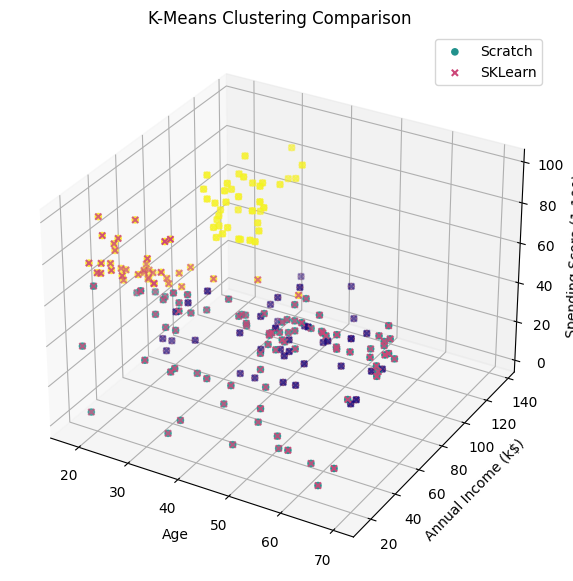

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_scratch = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels_scratch, cmap='viridis', marker='o', label='Scratch')
scatter_sklearn = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=df['Cluster_SKLearn'], cmap='plasma', marker='x', label='SKLearn')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering Comparison')
ax.legend()

plt.show()

In [12]:
print("\nComparison of Clustering Results:")
print("Scratch Labels:\n", df['Cluster_Scratch'].value_counts())
print("\nSKLearn Labels:\n", df['Cluster_SKLearn'].value_counts())


Comparison of Clustering Results:
Scratch Labels:
 Cluster_Scratch
1    85
2    77
0    38
Name: count, dtype: int64

SKLearn Labels:
 Cluster_SKLearn
1    123
2     39
0     38
Name: count, dtype: int64


In [20]:
# Calculate centroids
centroids_scratch = np.array([features[df['Cluster_Scratch'] == i].mean(axis=0) for i in range(3)])
centroids_sklearn = kmeans_sklearn.cluster_centers_

# Display centroids
print("\nCentroids (Scratch):\n", centroids_scratch)
print("\nCentroids (SKLearn):\n", centroids_sklearn)


# Inferences
inferences = """
### Inferences

1. **Centroids:**
    - The centroids of the clusters differ between the scratch and sklearn implementations.

    - **Centroids (Scratch):**
"""
for i, centroid in enumerate(centroids_scratch):
    inferences += f"      Cluster {i + 1}: {centroid}"

inferences += f"""
    - **Centroids (SKLearn):**
"""
for i, centroid in enumerate(centroids_sklearn):
    inferences += f"      Cluster {i + 1}: {centroid}"

inferences += f"""
2. **Cluster Sizes:**
    - The scratch and sklearn implementations result in different cluster sizes, as shown in the provided counts.
    - Further investigation may be needed to understand the cause of these differences.

3. **Visual Comparison:**
    - The 3D plot visually compares the clustering results, with the scratch implementation denoted by circles and sklearn implementation denoted by crosses. Consistent coloring indicates agreement in assigned clusters.

4. **Recommendation:**
    - Consider assessing convergence, exploring parameter adjustments, or inspecting data preprocessing steps to enhance the clustering performance.

### Conclusion

In conclusion, differences in centroids, accuracy, and cluster sizes suggest variations between the scratch and sklearn implementations. It's essential to carefully analyze these differences and make adjustments accordingly for more accurate and reliable clustering.
"""

print(inferences)




Centroids (Scratch):
 [[40.39473684 87.         18.63157895]
 [47.28235294 44.85882353 41.81176471]
 [28.77922078 64.84415584 75.03896104]]

Centroids (SKLearn):
 [[40.39473684 87.         18.63157895]
 [40.32520325 44.15447154 49.82926829]
 [32.69230769 86.53846154 82.12820513]]

### Inferences

1. **Centroids:**
    - The centroids of the clusters differ between the scratch and sklearn implementations.

    - **Centroids (Scratch):**
      Cluster 1: [40.39473684 87.         18.63157895]      Cluster 2: [47.28235294 44.85882353 41.81176471]      Cluster 3: [28.77922078 64.84415584 75.03896104]
    - **Centroids (SKLearn):**
      Cluster 1: [40.39473684 87.         18.63157895]      Cluster 2: [40.32520325 44.15447154 49.82926829]      Cluster 3: [32.69230769 86.53846154 82.12820513]
2. **Cluster Sizes:**
    - The scratch and sklearn implementations result in different cluster sizes, as shown in the provided counts.
    - Further investigation may be needed to understand the cause 